In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

### Reading training data

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

/Users/arushi/miniconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


### Reading other supplementary files

In [3]:
items = pd.read_csv('data/items.csv')
oil = pd.read_csv('data/oil.csv')
stores = pd.read_csv('data/stores.csv')
holidays = pd.read_csv('data/holidays_events.csv')
transactions = pd.read_csv('data/transactions.csv')

In [4]:
train_data["date"] = pd.to_datetime(train_data["date"])

In [118]:
# Merging store data
store_data = pd.merge(train_data, stores, on = 'store_nbr', how = 'left')
store_data.head(2)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,2013-01-01,25,103665,7.0,Not Mentioned,Salinas,Santa Elena,D,1
1,2013-01-01,25,105574,1.0,Not Mentioned,Salinas,Santa Elena,D,1


### Average unit sales per state

In [11]:
state_sales= store_data.groupby(['state'], as_index=False)['unit_sales'].agg('sum')
state_sales = state_sales.sort_values(by='unit_sales', ascending=False)


In [12]:
state_sales.head()

,state,unit_sales
12,Pichincha,5.237571e+08
6,Guayas,1.473089e+08
0,Azuay,4.316014e+07
15,Tungurahua,3.622837e+07
14,Santo Domingo de los Tsachilas,3.166574e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

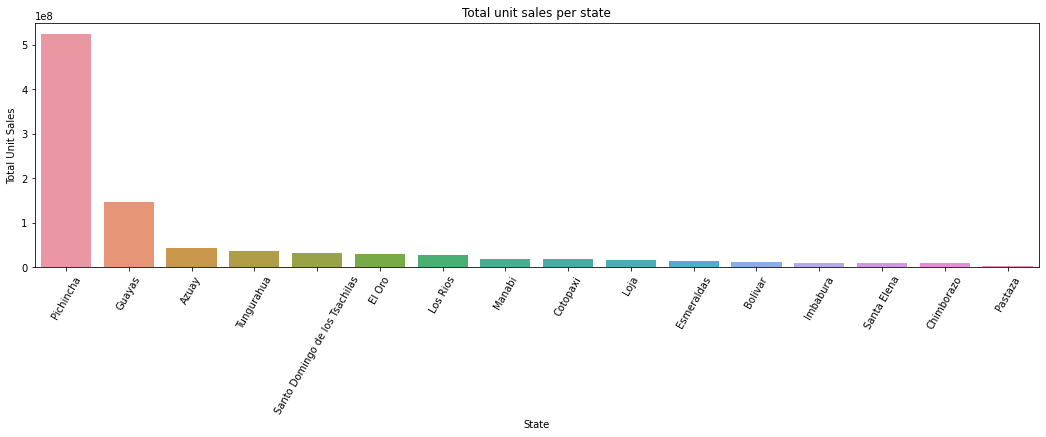

In [15]:
rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="state", y="unit_sales", data=state_sales)
plt.title("Total unit sales per state")
plt.xlabel("State")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

We see an unusually high total unit sales for the state Pichincha. So let's look at how much each city in this state contributes to the total unit sales.

In [21]:
store_data[store_data.state == 'Pichincha'].city.value_counts()

Quito      46233773
Cayambe     2286721
Name: city, dtype: int64

State 'Pichincha' has the highest total unit sales and is an outlier.

### Total unit sales per city

In [16]:
city_sales= store_data.groupby(['city'], as_index=False)['unit_sales'].agg('sum')
city_sales = city_sales.sort_values(by='unit_sales', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

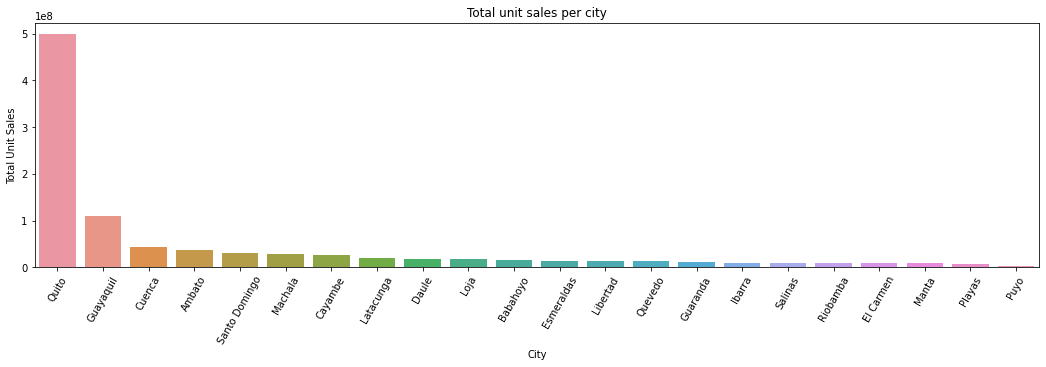

In [17]:
rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="city", y="unit_sales", data=city_sales)
plt.title("Total unit sales per city")
plt.xlabel("City")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

City 'Quito' comes under state Pichincho which has the highest total unit sales and looks like Quito is responsible for that.

### Total Unit sales per store

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text major ticklabel objects>)

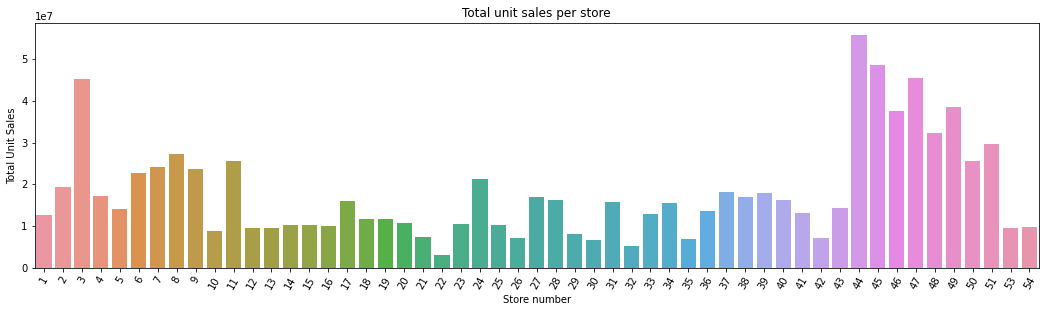

In [24]:
store_sales= store_data.groupby(['store_nbr'], as_index=False)['unit_sales'].agg('sum')
store_sales = store_sales.sort_values(by='unit_sales', ascending=False)

rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="store_nbr", y="unit_sales", data=store_sales)
plt.title("Total unit sales per store")
plt.xlabel("Store number")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

And from here, we understand that most of the stores having the highest unit sales are from Pichincho state.
And we also see a high amount of variation in unit sales across different stores.

In [31]:
pichincho_data = store_data[store_data.state == 'Pichincha']
pichincho_data.shape

(48520494, 9)

In [50]:
pichincho_data.store_nbr.value_counts()

44    3129711
45    3103114
47    3079062
3     3031687
46    2988071
49    2971093
8     2913207
48    2887595
6     2762246
2     2674410
7     2607562
4     2533550
9     2472969
1     2294600
11    2286721
18    1928893
17    1915373
10    1557269
20    1383361
Name: store_nbr, dtype: int64

Data from Pichincho is 43.7 % of the total dataset and have 19 stores out of 52! 

In [37]:
# Dropping Pichincha data from the main dataframe
store_data = store_data[store_data.state != 'Pichincha']

### Total unit sales per item family

In [40]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [73]:
# Merge item data 
item_data = pd.merge(store_data, items, on = 'item_nbr', how = 'left')
item_data.head(3)


,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable
0,2013-01-01,25,103665,7.0,NaN,Salinas,Santa Elena,D,1,BREAD/BAKERY,2712,1
1,2013-01-01,25,105574,1.0,NaN,Salinas,Santa Elena,D,1,GROCERY I,1045,0
2,2013-01-01,25,105575,2.0,NaN,Salinas,Santa Elena,D,1,GROCERY I,1045,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

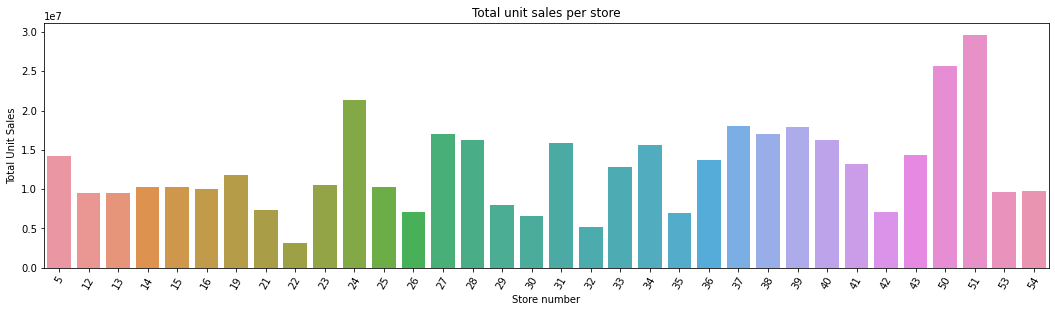

In [42]:
store_sales = item_data.groupby(['store_nbr'], as_index=False)['unit_sales'].agg('sum')
store_sales = store_sales.sort_values(by='unit_sales', ascending=False)

rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="store_nbr", y="unit_sales", data=store_sales)
plt.title("Total unit sales per store")
plt.xlabel("Store number")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

There is a long tail of item families with very low unit sales and we can create a new category other and 
put the tail items into that category

### Total Unit sales per Item Family

In [74]:
# Replace the big tail of items with others

item_data['family'] = item_data['family'].replace(['HOME AND KITCHEN I','HOME AND KITCHEN II','CELEBRATION',
                                             'AUTOMOTIVE', 'LINGERIE', 'GROCERY II', 'SEAFOOD',
                                             'PLAYERS AND ELECTRONICS', 'LADIESWEAR', 'BEAUTY', 'PET SUPPLIES',
                                            'LAWN AND GARDEN', 'MAGAZINES', 'HARDWARE',
                                             'SCHOOL AND OFFICE SUPPLIES', 'HOME APPLIANCES', 'BABY CARE',
                                            'BOOKS'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

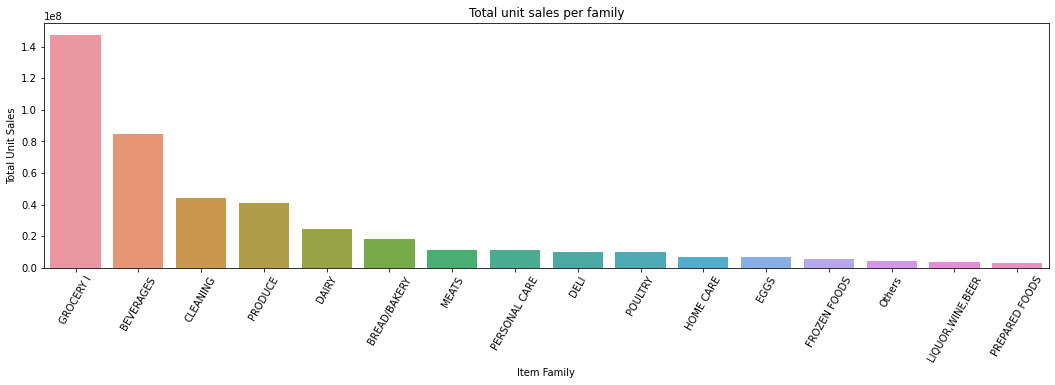

In [48]:
family_sales = item_data.groupby(['family'], as_index=False)['unit_sales'].agg('sum')
family_sales = family_sales.sort_values(by='unit_sales', ascending=False)

rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="family", y="unit_sales", data=family_sales)
plt.title("Total unit sales per family")
plt.xlabel("Item Family")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

In [49]:
item_data.shape

(62487032, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

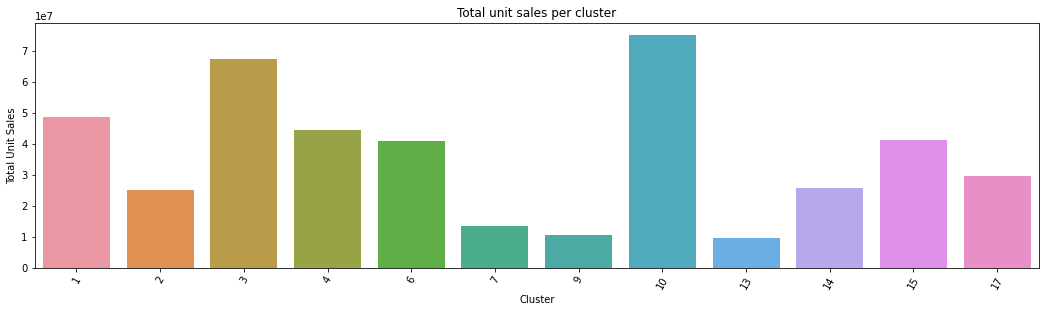

In [52]:
cluster_sales = item_data.groupby(['cluster'], as_index=False)['unit_sales'].agg('sum')
cluster_sales = cluster_sales.sort_values(by='unit_sales', ascending=False)

rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="cluster", y="unit_sales", data=cluster_sales)
plt.title("Total unit sales per cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

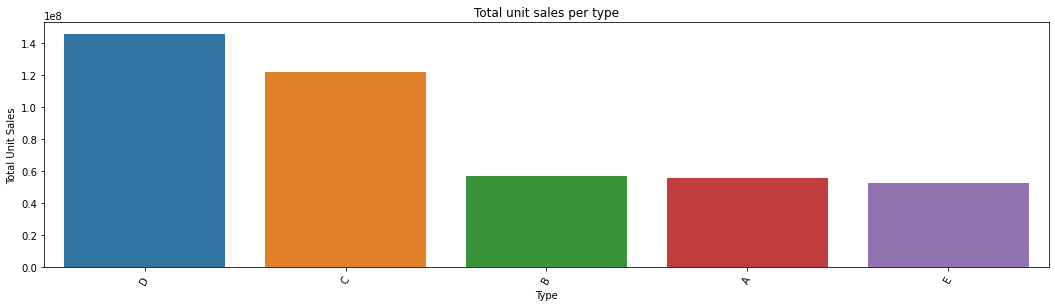

In [60]:
type_sales = item_data.groupby(['type'], as_index=False)['unit_sales'].agg('sum')
type_sales = type_sales.sort_values(by='unit_sales', ascending=False)

rcParams['figure.figsize'] = 18,4.5
ax = sns.barplot(x="type", y="unit_sales", data=type_sales)
plt.title("Total unit sales per type")
plt.xlabel("Type")
plt.ylabel("Total Unit Sales")
plt.xticks(rotation=60)

In [75]:
# Dropping columns city, item_nbr, class from item_data

item_data = item_data.drop(['city','class'], axis=1)

In [76]:
item_data.head(2)

,date,store_nbr,item_nbr,unit_sales,onpromotion,state,type,cluster,family,perishable
0,2013-01-01,25,103665,7.0,NaN,Santa Elena,D,1,BREAD/BAKERY,1
1,2013-01-01,25,105574,1.0,NaN,Santa Elena,D,1,GROCERY I,0


### Merging oil and holidays data

In [77]:
# Merging oil data
oil["date"] = pd.to_datetime(oil["date"])
oil = oil.rename(columns={"dcoilwtico": "oil_price"})
data = pd.merge(item_data, oil, on = 'date', how = 'left')

In [80]:
# Adding holidays

# Replace holidays with other names to holidays
holidays['type'] = holidays['type'].replace(['Additional','Bridge','Event','Transfer'], 'Holiday')

# As we don't need any other info from the Holiday section, we will drop rest of the columns
holidays = holidays.drop(['locale', 'locale_name','description','transferred'], axis=1)

# Merge holidays into train dataset
holidays["date"] = pd.to_datetime(holidays["date"])
holidays = holidays.rename(columns={"type": "day_type"})

data = pd.merge(data, holidays, on = 'date', how = 'left')
data.head(2)

,date,store_nbr,item_nbr,unit_sales,onpromotion,state,type,cluster,family,perishable,oil_price,day_type
0,2013-01-01,25,103665,7.0,NaN,Santa Elena,D,1,BREAD/BAKERY,1,NaN,Holiday
1,2013-01-01,25,105574,1.0,NaN,Santa Elena,D,1,GROCERY I,0,NaN,Holiday


### Creating date features

In [81]:
# Adding day, month, year to the dataset

data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data.head(2)

,date,store_nbr,item_nbr,unit_sales,onpromotion,state,type,cluster,family,perishable,oil_price,day_type,day,month,year
0,2013-01-01,25,103665,7.0,NaN,Santa Elena,D,1,BREAD/BAKERY,1,NaN,Holiday,1,1,2013
1,2013-01-01,25,105574,1.0,NaN,Santa Elena,D,1,GROCERY I,0,NaN,Holiday,1,1,2013


In [109]:
data['quarter'] = data['date'].dt.quarter

### Handling missing values 

In [82]:
data.isnull().sum().sort_values(ascending=False)

day_type       52811423
oil_price      20775443
onpromotion    11972845
year                  0
month                 0
day                   0
perishable            0
family                0
cluster               0
type                  0
state                 0
unit_sales            0
item_nbr              0
store_nbr             0
date                  0
dtype: int64

There are 3 columns having null values. 

1. day_type is from the holidays data. So, if there is any missing value in holidays, we will assume it's a workday.
2. For missing values in oil_price, we will fill it with the previous day's oil price value.
3. For missing values in onpromotion, we can create a new column saying the not captured.

In [83]:
# Replacing missing values of holidays
data['day_type'] = data['day_type'].fillna("Work Day")

# Replace missing values in Oil_Price
data['oil_price'] = data["oil_price"].fillna(axis = 0,method = 'ffill')

# Replace missing onpromotion values with "Not Mentioned"
train_data['onpromotion'] = train_data['onpromotion'].fillna("Not Mentioned")

In [97]:
data.isnull().sum().sort_values(ascending=False)

oil_price      578
year             0
month            0
day              0
day_type         0
perishable       0
family           0
cluster          0
type             0
state            0
onpromotion      0
unit_sales       0
item_nbr         0
store_nbr        0
date             0
dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63641985 entries, 0 to 63641984
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   unit_sales   float64       
 4   onpromotion  object        
 5   state        object        
 6   type         object        
 7   cluster      int64         
 8   family       object        
 9   perishable   int64         
 10  oil_price    float64       
 11  day_type     object        
 12  day          int64         
 13  month        int64         
 14  year         int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 7.6+ GB


### Yearly sales

In [110]:
data.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,state,type,cluster,family,perishable,oil_price,day_type,day,month,year,quarter
0,2013-01-01,25,103665,7.0,Not Mentioned,Santa Elena,D,1,BREAD/BAKERY,1,NaN,Holiday,1,1,2013,1
1,2013-01-01,25,105574,1.0,Not Mentioned,Santa Elena,D,1,GROCERY I,0,NaN,Holiday,1,1,2013,1
2,2013-01-01,25,105575,2.0,Not Mentioned,Santa Elena,D,1,GROCERY I,0,NaN,Holiday,1,1,2013,1
3,2013-01-01,25,108079,1.0,Not Mentioned,Santa Elena,D,1,GROCERY I,0,NaN,Holiday,1,1,2013,1
4,2013-01-01,25,108701,1.0,Not Mentioned,Santa Elena,D,1,DELI,1,NaN,Holiday,1,1,2013,1


In [111]:
data_subset = data[data.year != 2017]

Text(0, 0.5, 'Avg Unit Sales')

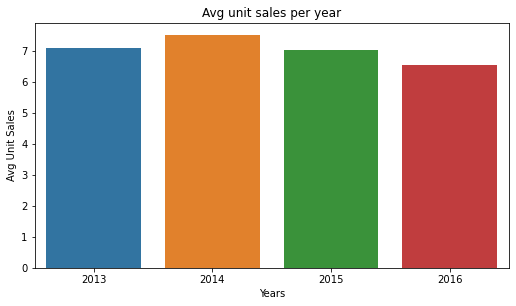

In [107]:
yearly_sales = data_subset.groupby(['year'], as_index=False)['unit_sales'].agg('mean')

rcParams['figure.figsize'] = 8.5,4.5
ax = sns.barplot(x="year", y="unit_sales", data=yearly_sales)
plt.title("Avg unit sales per year")
plt.xlabel("Years")
plt.ylabel("Avg Unit Sales")


### Monthly Sales

Text(0, 0.5, 'Avg Unit Sales')

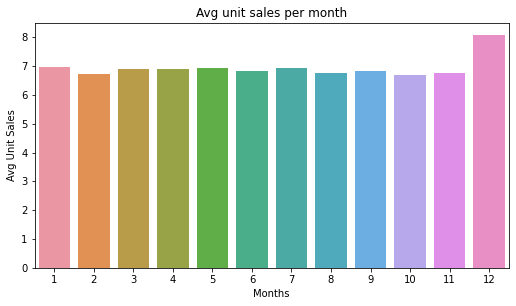

In [108]:
# Dropping 2017's 3 months data before checking for monthly and quarterly sales

monthly_sales = data_subset.groupby(['month'], as_index=False)['unit_sales'].agg('mean')

rcParams['figure.figsize'] = 8.5,4.5
ax = sns.barplot(x="month", y="unit_sales", data=monthly_sales)
plt.title("Avg unit sales per month")
plt.xlabel("Months")
plt.ylabel("Avg Unit Sales")

### Quarterly Sales

Text(0, 0.5, 'Avg Unit Sales')

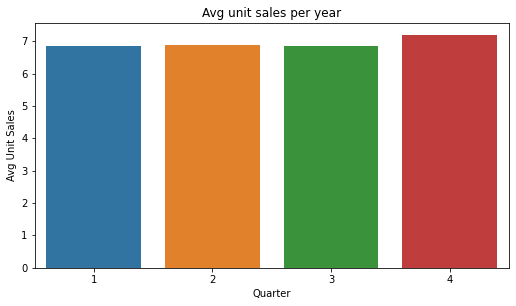

In [112]:
quarterly_sales = data_subset.groupby(['quarter'], as_index=False)['unit_sales'].agg('mean')

rcParams['figure.figsize'] = 8.5,4.5
ax = sns.barplot(x="quarter", y="unit_sales", data=quarterly_sales)
plt.title("Avg unit sales per year")
plt.xlabel("Quarter")
plt.ylabel("Avg Unit Sales")

### Daily Avg Unit sales

Text(0, 0.5, 'Avg Unit Sales')

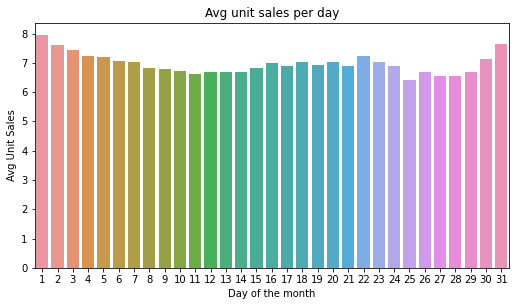

In [113]:
daily_sales = data_subset.groupby(['day'], as_index=False)['unit_sales'].agg('mean')

rcParams['figure.figsize'] = 8.5,4.5
ax = sns.barplot(x="day", y="unit_sales", data=daily_sales)
plt.title("Avg unit sales per day")
plt.xlabel("Day of the month")
plt.ylabel("Avg Unit Sales")

### How does oil price affect unit sales?

In [123]:
oil_sales = data[['date','oil_price','unit_sales']]
d = {'oil_price':'oil_price', 'unit_sales':'total_sales'}
oil_sales = oil_sales.groupby('date').agg({'oil_price':'mean', 'unit_sales':'sum'}).rename(columns=d)

Text(0.5, 1.0, 'Variation of unit sales with oil prices')

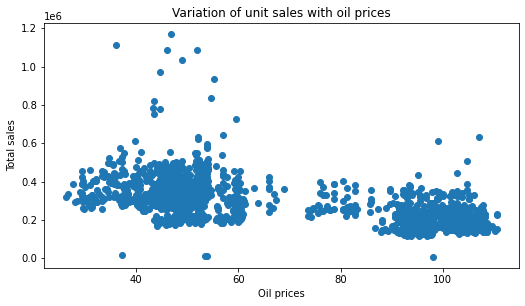

In [124]:
plt.scatter(oil_sales.oil_price, oil_sales.total_sales)
plt.xlabel("Oil prices")
plt.ylabel("Total sales")
plt.title("Variation of unit sales with oil prices")

Oil prices affect the total unit sales. We see that as the oil price increased from the range 40-60 to above 60, the total unit sales dropped.

### Effect of Holidays on unit sales

In [135]:
holiday_sales = data[['day_type','unit_sales']]
holiday_sales = holiday_sales.groupby('day_type').agg({'unit_sales':'sum'})

In [138]:
holiday_sales.reset_index().head()

,day_type,unit_sales
0,Holiday,7.773438e+07
1,Work Day,3.628106e+08
